In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
df = pd.read_csv('heart.csv', sep=',')
x = df.drop(["target"], axis=1)
y = df["target"]
%matplotlib inline


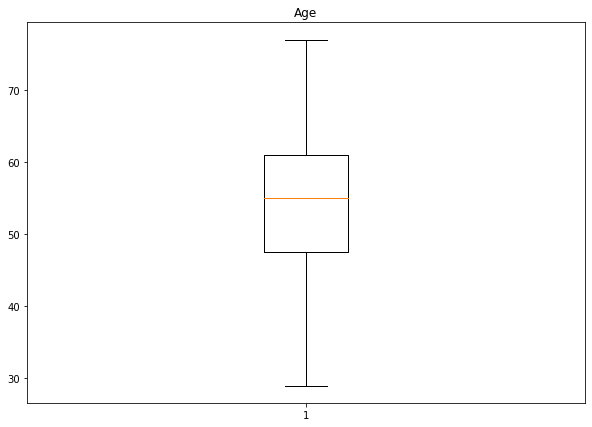

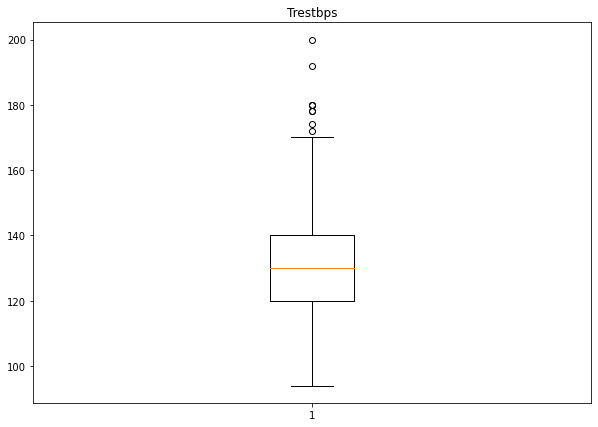

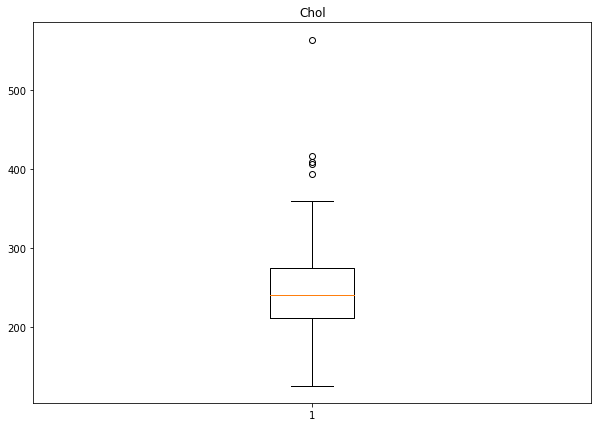

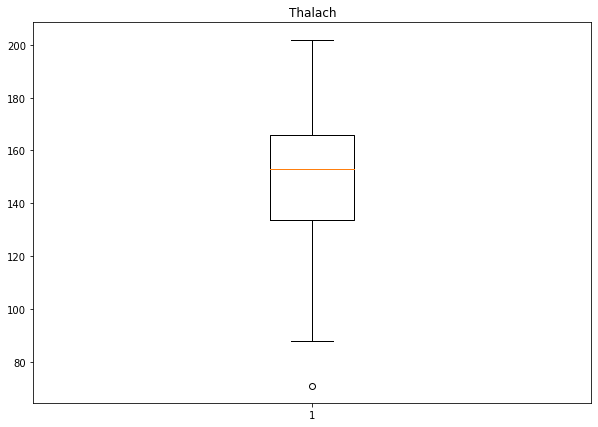

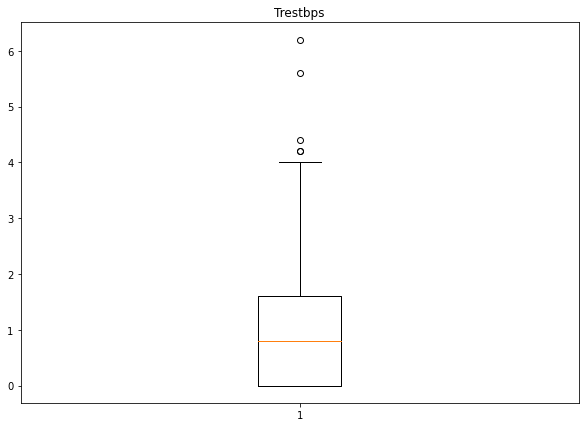

In [109]:
def create_boxplot(data, title):
    fig = plt.figure(figsize =(10, 7))
    plt.title(title)
    plt.boxplot(data)
    plt.show()
create_boxplot(df['age'], 'Age')
create_boxplot(df['trestbps'], 'Trestbps')
create_boxplot(df['chol'], 'Chol')
create_boxplot(df['thalach'], 'Thalach')
create_boxplot(df['oldpeak'], 'Trestbps')

# PCA

In [110]:
scaler = StandardScaler()
scaler.fit(x)
xs = scaler.transform(x)
model = PCA(n_components=9).fit(xs)
xs_pc = model.transform(xs)
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
print(df)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(xs_pc)
xs_out = min_max_scaler.transform(xs_pc)
x_train, x_test, y_train, y_test = train_test_split(xs_out, y, test_size=0.2, random_state = 0)

     0         1
0  PC0   oldpeak
1  PC1  trestbps
2  PC2       sex
3  PC3     slope
4  PC4        ca
5  PC5   restecg
6  PC6       fbs
7  PC7  trestbps
8  PC8        ca


# Perceptron

0.7704918032786885
0.747678 accuracy with a standard deviation of 0.092774


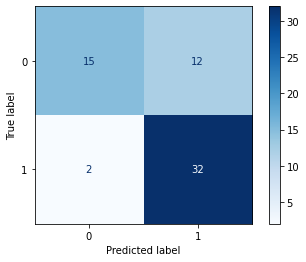

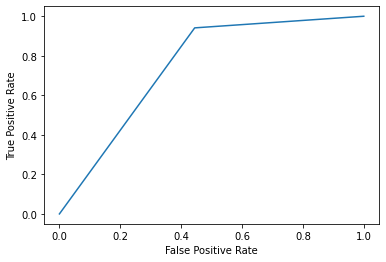

              precision    recall  f1-score   support

           0       0.88      0.56      0.68        27
           1       0.73      0.94      0.82        34

    accuracy                           0.77        61
   macro avg       0.80      0.75      0.75        61
weighted avg       0.80      0.77      0.76        61



In [111]:
perceptron = Perceptron(tol=1e-3, random_state=0)
clf = perceptron.fit(x_train, y_train)
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
scores = cross_val_score(clf, x_train, y_train, cv=4)  
print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(classification_report(y_test, y_pred))

# Regresja logistyczna

0.819672131147541
0.843169 accuracy with a standard deviation of 0.026201


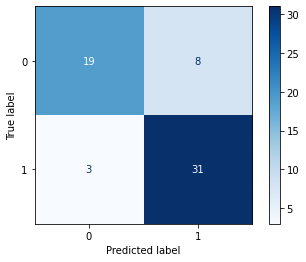

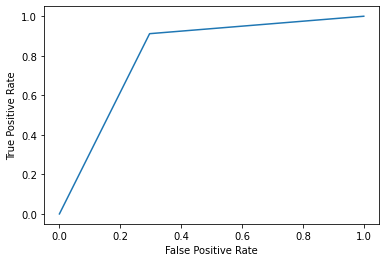

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [112]:
logistic_regression = LogisticRegression(random_state=0)
clf = logistic_regression.fit(x_train, y_train)
print(clf.score(x_test, y_test))
predictions = clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
y_pred = clf.predict(x_test)
scores = cross_val_score(clf, x_train, y_train, cv=4)  
print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.show()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(classification_report(y_test, y_pred))

# Naiwny Bayes

In [113]:
gmb = GaussianNB()
clf = gmb.fit(x_train, y_train)
score = metrics.accuracy_score(y_test, clf.predict(x_test))
results = []
results.append({
    'estimator': gmb,
    'score': clf.score(x_test, y_test)
})

params = {
    'fit_prior': [True, False],
    'alpha': [a/10 for a in range(1, 11)]
}

bernoulliGS = GridSearchCV(estimator=BernoulliNB(), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, scoring = "accuracy")
clf = bernoulliGS.fit(x_train, y_train)
results.append({
    'estimator': clf.best_estimator_,
    'score': clf.score(x_test, y_test)
})

multinomialGS = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, scoring = "accuracy")
clf = multinomialGS.fit(x_train, y_train)
results.append({
    'estimator': clf.best_estimator_,
    'score': clf.score(x_test, y_test)
})

complementGS = GridSearchCV(estimator=ComplementNB(), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, scoring = "accuracy")
clf = complementGS.fit(x_train, y_train)
results.append({
    'estimator': clf.best_estimator_,
    'score': clf.score(x_test, y_test)
})
results = sorted(results, key=lambda x: x['score'], reverse=True)
data = pd.DataFrame(results)
data

,estimator,score
0,GaussianNB(),0.852459
1,"MultinomialNB(alpha=0.1, fit_prior=False)",0.836066
2,ComplementNB(alpha=0.1),0.836066
3,BernoulliNB(alpha=0.1),0.540984


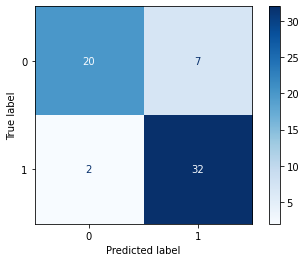

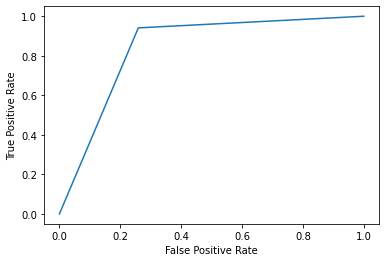

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [114]:
%matplotlib inline
nb_best_estimator = results[0]['estimator']
clf = nb_best_estimator.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.show()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(classification_report(y_test, y_pred))

# Drzewo decyzyjne

0.8032786885245902


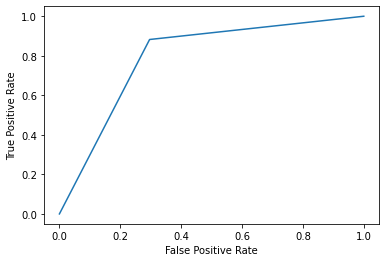

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



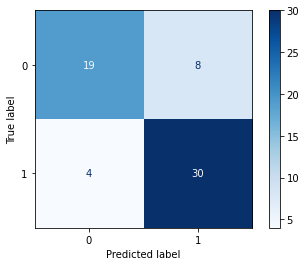

In [115]:
criterion = ['gini', 'entropy']
max_depths = [x for x in range(2, 9)]
min_samples_split = [x for x in range(2, 20, 2)]
min_samples_leaf = [x for x in range(2, 20, 2)]
max_leaf_nodes = [x for x in range(5, 100, 5)]
max_features = [x for x in range(1, x_train.shape[1])]
params = {
    'max_depth': max_depths,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'max_leaf_nodes': max_leaf_nodes,
    'max_features': max_features
}
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, scoring = "accuracy")
clf = grid_search.fit(x_train, y_train)
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap = 'Blues')
print(classification_report(y_test, y_pred))

# Voting Classifier

In [116]:
estimator = []
estimator.append(('LR', logistic_regression))
estimator.append(('GMB', nb_best_estimator))
estimator.append(('DTC', grid_search.best_estimator_))
  
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
scores = cross_val_score(vot_hard, x_train, y_train, cv=4)  
print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("Hard Voting Score % f" % accuracy_score(y_test, y_pred))
  
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
scores = cross_val_score(vot_soft, x_train, y_train, cv=4)  
print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("Soft Voting Score % f" % accuracy_score(y_test, y_pred))


0.826503 accuracy with a standard deviation of 0.006831
Hard Voting Score  0.819672
0.818306 accuracy with a standard deviation of 0.018979
Soft Voting Score  0.819672
